In [1]:
import numpy as np
import pandas as pd
from scipy.special import erf
from scipy.stats import norm
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import lognorm
from pytictoc import TicToc

In [2]:
#Simulate an arithmetic Brownian motion
#dX(t) = mu*dt + sigma*dW(t)

#Define parameters and time grid
npaths=np.power(10,4)*2 #number of paths
T=1 #time horizon
nsteps=200 #number of time steps
dt=T/nsteps #time step
t=np.arange(0,T,dt) #observation times 
mu,sigma=0.12,0.4 #model parameters

#Compute and accumulate the increments

#Precompute a matrix of standard Gaussian random numbers
N=np.random.randn(npaths,nsteps)

#Only vector instructions
timing=TicToc()
timing.tic()
dX=mu*dt+sigma*np.sqrt(dt)*N
dX=np.insert(dX,0,0,axis=1)
dX=np.delete(dX,-1,axis=1)
X=np.cumsum(dX,axis=1)
timing.toc()

Elapsed time is 0.087126 seconds.


In [3]:
#(a) Loop over time steps (see oup.m and cirp.m)
Xa=np.zeros(nsteps*npaths).reshape((npaths,nsteps))
timing.tic()
for k in range(nsteps-1):
    Xa[:,k+1]=Xa[:,k]+mu*dt+sigma*np.sqrt(dt)*N[:,k]
timing.toc()
maxdiff_a=np.max(abs(X-Xa))

Elapsed time is 0.246291 seconds.


In [10]:
#(b) Loop over paths
timing.tic()
dXb=np.zeros(nsteps*npaths).reshape((npaths,nsteps))
for l in range(npaths):
   dXb[l,:]=mu*dt+sigma*np.sqrt(dt)*N[l,:]
dXb=np.insert(dXb,0,0,axis=1)
dXb=np.delete(dXb,-1,axis=1)
Xb=np.cumsum(dXb,axis=1)
timing.toc()
maxdiff_b=np.max(abs(X-Xb))

Elapsed time is 0.316981 seconds.


In [11]:
#(c) 1.Two nested loops over time steps and paths
timing.tic()
#Allocate and initialise all paths
Xc=np.zeros(nsteps*npaths).reshape((npaths,nsteps))
for m in range(nsteps-1):
    for n in range(npaths):
        Xc[n][m+1]=Xc[n][m]+mu*dt+sigma*np.sqrt(dt)*N[n][m]
timing.toc()
maxdiff_c1=np.max(abs(X-Xc))

Elapsed time is 12.945037 seconds.


In [12]:
#(c) 2.Two nested loops over paths and time steps
timing.tic()
#Allocate and initialise all paths
Xc2=np.zeros(nsteps*npaths).reshape((npaths,nsteps))
for m in range(npaths):
    for n in range(nsteps-1):
        Xc2[m][n+1]=Xc[m][n]+mu*dt+sigma*np.sqrt(dt)*N[m][n]
timing.toc()
maxdiff_c2=np.max(abs(X-Xc2))

Elapsed time is 10.506621 seconds.


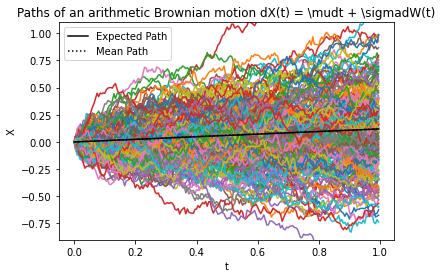

In [13]:
#Compute the expected path
EX=mu*t 
df = pd.concat([pd.Series(x) for x in X], axis=1)
df.index=t 
mean_per_step=list(df.apply(lambda row: np.mean(row),axis=1)) #mean per step

#Plot the expected, mean and sample path
plt.figure(1)
for p in range(nsteps):
    plt.plot(t,X[p])
plt.plot(t,EX,'k',label='Expected Path')
plt.plot(t,mean_per_step,':k',label='Mean Path')
plt.xlabel('t')
plt.ylabel('X')
plt.ylim([-0.9,1.1])
plt.title('Paths of an arithmetic Brownian motion dX(t) = \mudt + \sigmadW(t)')
plt.legend()
plt.show()

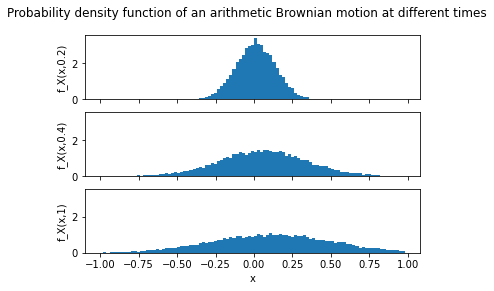

In [14]:
#Plot the probability density function at different times
x=np.arange(-1,1,0.02)
fig, axs = plt.subplots(3,sharex=True,sharey=True)
fig.suptitle('Probability density function of an arithmetic Brownian motion at different times')
axs[0].hist(X[:,20],bins=x,density=True)
axs[0].set_ylabel('f_X(x,0.2)')
axs[1].hist(X[:,100],bins=x,density=True)
axs[1].set_ylabel('f_X(x,0.4)')
axs[2].hist(X[:,-1],bins=x,density=True)
axs[2].set_ylabel('f_X(x,1)')
axs[2].set_xlabel('x')
plt.show()